<a href="https://colab.research.google.com/github/Usman-938/Assignments/blob/main/Home_Work_week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import requests

# URL to list the contents of the master branch of the repository
repo_contents_url = 'https://api.github.com/repos/selva86/datasets/contents'

try:
    response = requests.get(repo_contents_url)
    response.raise_for_status() # Raise an HTTPError for bad responses (4xx or 5xx)

    contents = response.json()
    print("Available files in the 'selva86/datasets' repository (master branch):")
    csv_files = []
    for item in contents:
        if item['type'] == 'file' and item['name'].endswith('.csv'):
            csv_files.append(item['name'])
            print(f"- {item['name']}")

    if not csv_files:
        print("No CSV files found in the root of this repository.")

except requests.exceptions.HTTPError as e:
    print(f"HTTP Error: {e} while accessing {repo_contents_url}")
except Exception as e:
    print(f"An error occurred: {e}")

Available files in the 'selva86/datasets' repository (master branch):
- 1M.csv
- Admission.csv
- Advertising.csv
- AirPassengers.csv
- Auto.csv
- BCF.csv
- BostonHousing.csv
- BreastCancer.csv
- CNAE9.csv
- Cars93.csv
- Cars93_miss.csv
- Carseats.csv
- ChickWeight.csv
- Churn_Modelling.csv
- Churn_Modelling_m.csv
- Clothing_Reviews_Small.csv
- College.csv
- GermanCredit.csv
- Glass.csv
- GlaucomaM.csv
- HamiltonGDP.csv
- Hitters.csv
- HouseVotes84.csv
- Ionosphere.csv
- Iris.csv
- IsraelPalestine.csv
- LetterRecognition.csv
- Life_Expectancy_Data.csv
- Mall_Customers_Int.csv
- MarketArrivals.csv
- PimaIndiansDiabetes.csv
- Prestige.csv
- Prestige_miss.csv
- Raotbl6.csv
- Sacramento.csv
- Servo.csv
- Smarket.csv
- Sonar.csv
- Soybean.csv
- ToothGrowth.csv
- USArrests.csv
- Vehicle.csv
- Vowel.csv
- Wage.csv
- Weekly.csv
- Zoo.csv
- a10.csv
- a10_missings.csv
- adultTest.csv
- adultTrain.csv
- adult_test.csv
- adult_train.csv
- austa.csv
- australian_capital_retail.csv
- bank-additional-

**Reasoning**:
The previous step successfully listed the available CSV files. I have identified 'Iris.csv' as a suitable dataset for classification with continuous data. I will now attempt to load this dataset using its correct URL, and then perform the initial inspection steps (head, info, describe) as previously outlined.



In [14]:
import pandas as pd
import requests
import io

# Define the correct URL for the Iris.csv dataset (verified from previous listing)
dataset_url = 'https://raw.githubusercontent.com/selva86/datasets/master/Iris.csv'

try:
    # Fetch the content of the CSV file using requests
    response = requests.get(dataset_url)
    response.raise_for_status() # Raise an HTTPError for bad responses (4xx or 5xx)

    # Use io.StringIO to read the content into a pandas DataFrame
    df = pd.read_csv(io.StringIO(response.text))

    print("First 5 rows of the dataset:")
    # Display the first 5 rows of the DataFrame
    print(df.head())

    print("\nConcise summary of the DataFrame (data types and non-null values):")
    # Print a concise summary of the DataFrame
    print(df.info())

    print("\nDescriptive statistics of the numerical columns:")
    # Generate descriptive statistics of the numerical columns
    print(df.describe())

except requests.exceptions.HTTPError as e:
    print(f"HTTP Error: {e}")
except Exception as e:
    print(f"An error occurred: {e}")

First 5 rows of the dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Concise summary of the DataFrame (data types and non-null values):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-n

## Perform Exploratory Data Analysis (EDA)

### Subtask:
Conduct a comprehensive EDA on the dataset. This will include identifying missing values, analyzing distributions of key features, exploring relationships between variables, and visualizing relevant aspects of the data. Make sure to provide legends to the visualization step.


**Reasoning**:
I will begin the EDA by checking for any missing values in the DataFrame, as this is a crucial first step before proceeding with further analysis or visualizations.



In [15]:
print("Missing values in the dataset:")
print(df.isnull().sum())

Missing values in the dataset:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


**Reasoning**:
Since there are no missing values, I will now visualize the distribution of the numerical features using histograms to understand their spread and central tendency. I will use `matplotlib.pyplot` and `seaborn` for this.



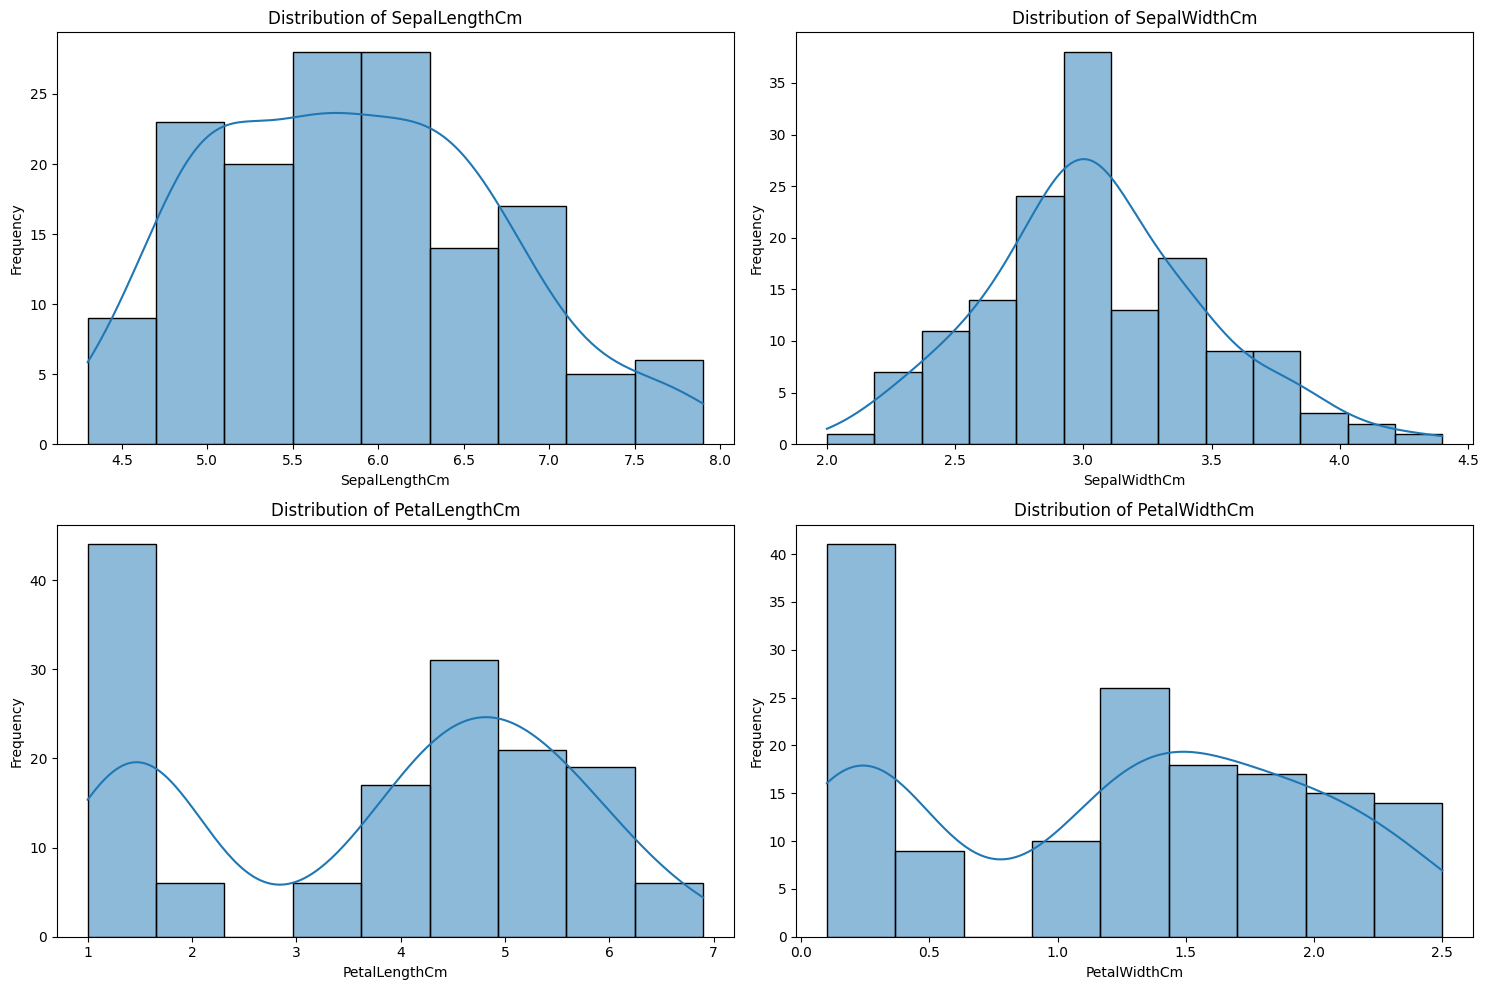

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical features to visualize
numerical_features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Create subplots for histograms
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1) # 2 rows, 2 columns
    sns.histplot(df[feature], kde=True) # kde=True for kernel density estimate
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


**Reasoning**:
Now, I will create box plots for each numerical feature, grouped by 'Species', to observe the distribution and identify potential outliers for each species, as per the instructions. This will help in understanding the feature distributions across different classes.



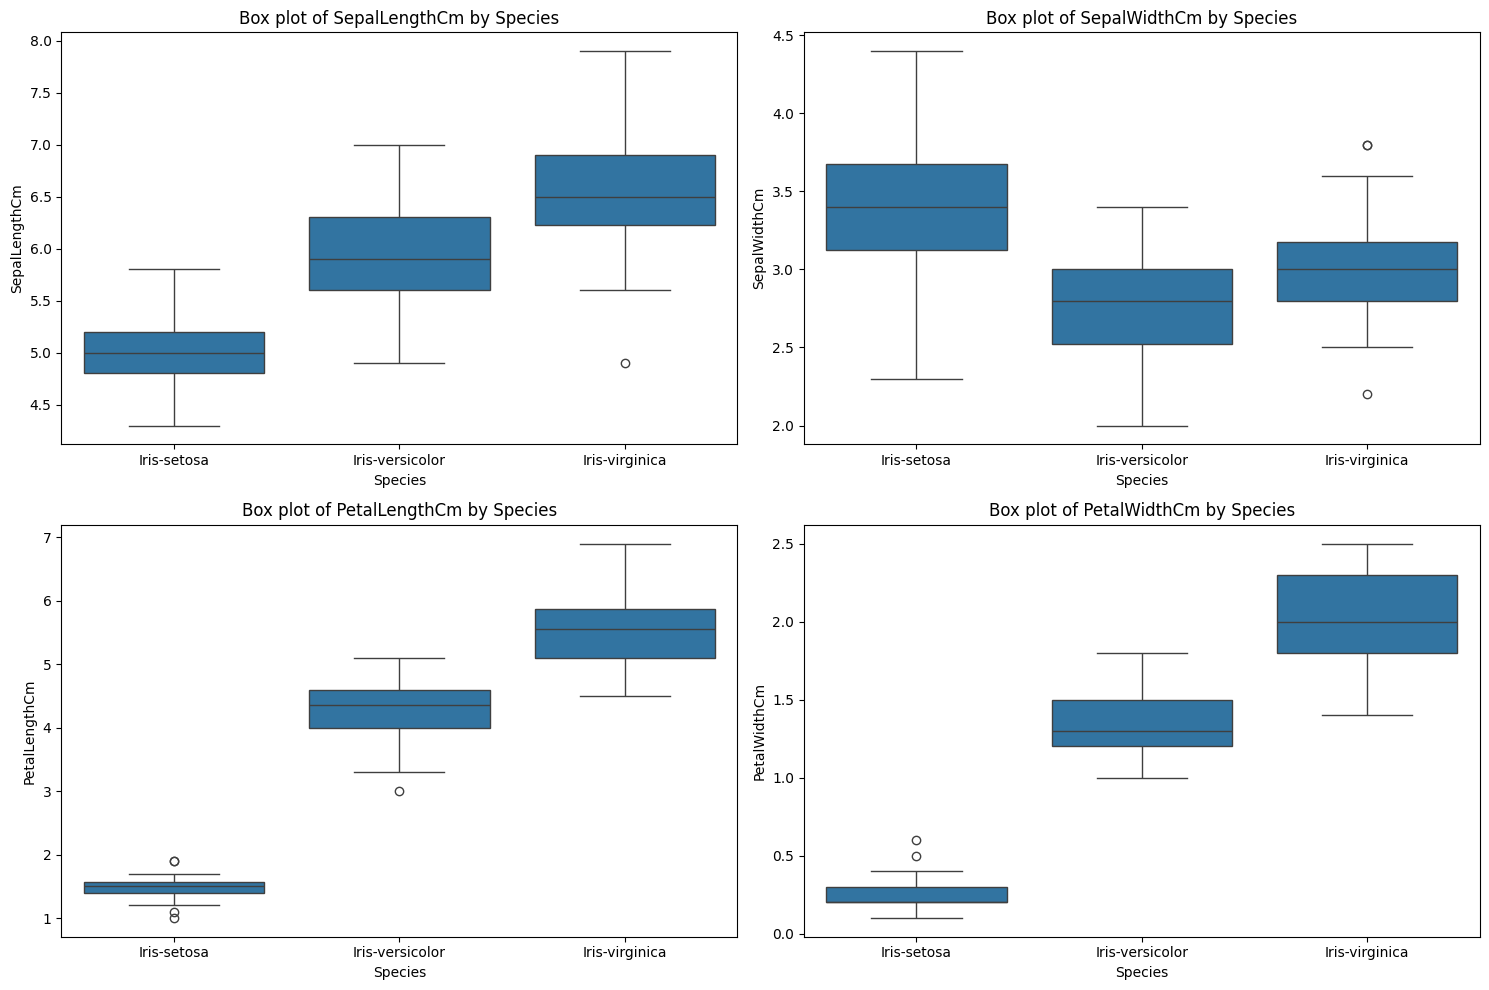

In [17]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='Species', y=feature, data=df)
    plt.title(f'Box plot of {feature} by Species')
    plt.xlabel('Species')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

**Reasoning**:
Next, I will generate a count plot for the 'Species' column to visualize the distribution of each class, as instructed. This will show the frequency of each species in the dataset.



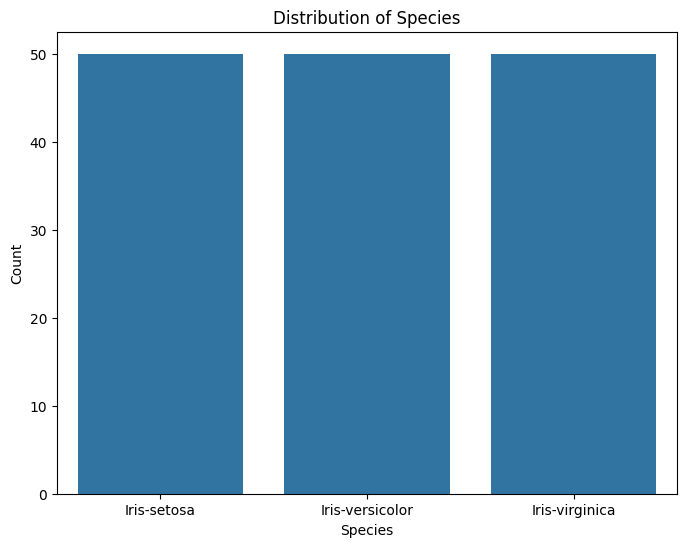

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Species', data=df)
plt.title('Distribution of Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

**Reasoning**:
Finally, I will create a pair plot to visualize the relationships between all numerical features and their distributions, colored by 'Species', to understand the separation between classes, as specified in the instructions. This plot will include a legend.



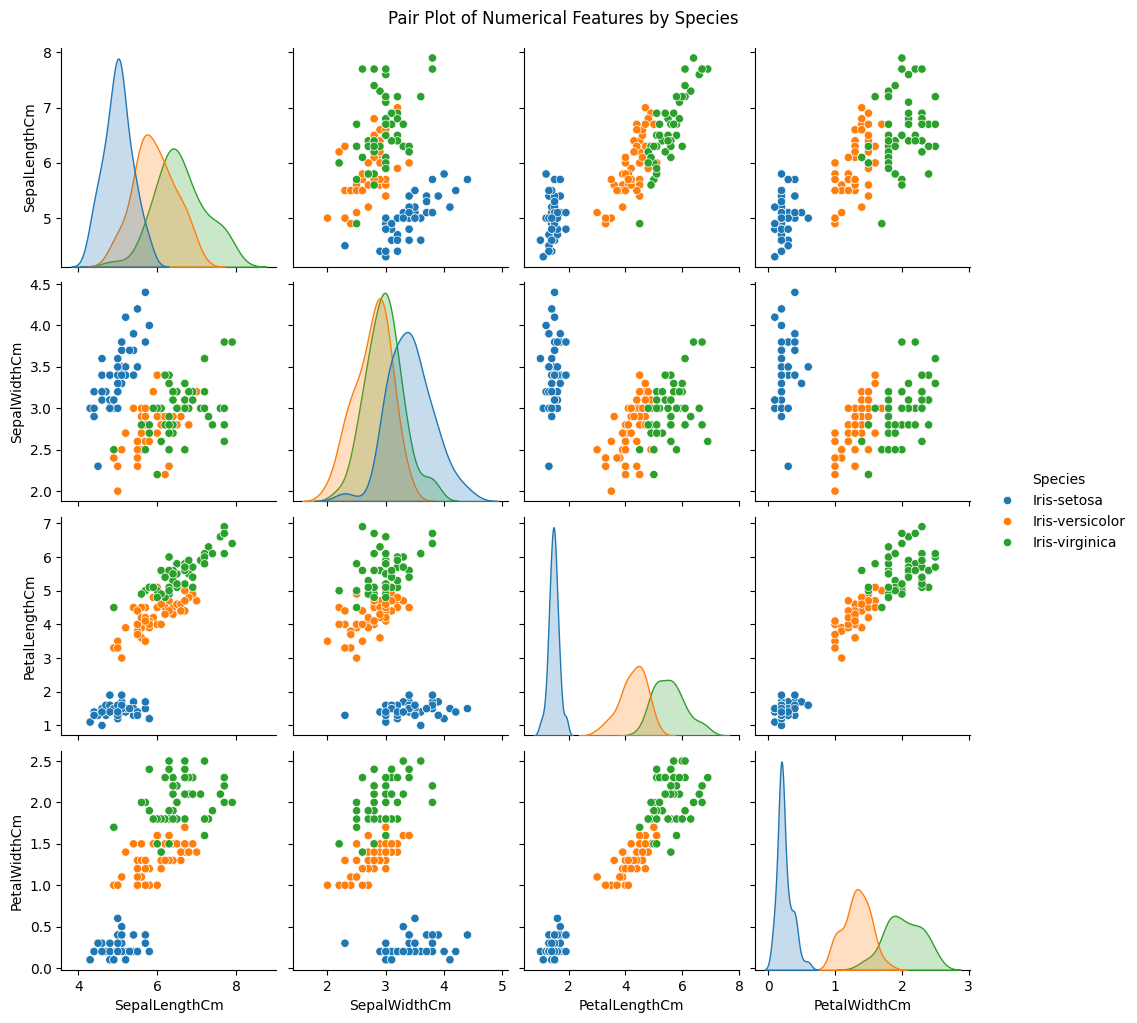

In [19]:
sns.pairplot(df.drop('Id', axis=1), hue='Species', diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features by Species', y=1.02)
plt.show()

## Preprocess Data for Model

### Subtask:
Based on the chosen classification model, preprocess the dataset. This will involve dropping unnecessary columns, encoding the target variable, splitting the data into features (X) and target (y), scaling numerical features, and splitting the data into training and testing sets.


**Reasoning**:
I will preprocess the data by dropping the 'Id' column, encoding the 'Species' target variable, separating features and target, scaling the numerical features using `StandardScaler`, and finally splitting the data into training and testing sets.



In [20]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# 1. Drop the 'Id' column
df_processed = df.drop('Id', axis=1)
print("DataFrame after dropping 'Id' column:")
print(df_processed.head())

# 2. Encode the 'Species' target variable
le = LabelEncoder()
df_processed['Species_encoded'] = le.fit_transform(df_processed['Species'])

# Store the mapping of original species names to encoded values
species_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(f"\nSpecies mapping: {species_mapping}")
print("DataFrame after encoding 'Species' column:")
print(df_processed.head())

# 3. Separate features (X) and target (y)
X = df_processed.drop(['Species', 'Species_encoded'], axis=1) # Features are all columns except original and encoded species
y = df_processed['Species_encoded'] # Target is the encoded species
print(f"\nFeatures (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")

# 4. Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("\nScaled Features (first 5 rows):")
print(X_scaled_df.head())

# 5. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

print(f"\nX_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

DataFrame after dropping 'Id' column:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

Species mapping: {'Iris-setosa': np.int64(0), 'Iris-versicolor': np.int64(1), 'Iris-virginica': np.int64(2)}
DataFrame after encoding 'Species' column:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0            5.1           3.5            1.4           0.2  Iris-setosa   
1            4.9           3.0            1.4           0.2  Iris-setosa   
2            4.7           3.2            1.3           0.2  Iris-setosa   
3            4.6           3.1            1.5           0.2  Iris-s

## Train and Test Classification Model

### Subtask:
Implement the chosen classification model, train it on the preprocessed training data, and then evaluate its performance using the testing set. Report key evaluation metrics (e.g., accuracy, precision, recall, F1-score).


**Reasoning**:
I will import the necessary libraries for Logistic Regression and evaluation metrics, instantiate the model, train it on the preprocessed data, make predictions, and then calculate and print the accuracy and classification report as specified in the instructions.



In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# 1. Instantiate a Logistic Regression model
# Set random_state for reproducibility and max_iter to prevent convergence warnings
model = LogisticRegression(random_state=42, max_iter=200)

# 2. Train the model using the training data
model.fit(X_train, y_train)
print("Logistic Regression model trained successfully.")

# 3. Make predictions on the test set
y_pred = model.predict(X_test)

# 4. Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

# 5. Print a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Logistic Regression model trained successfully.

Model Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Prepare Results for Submission

### Subtask:
Summarize the findings from the EDA, the model training and testing results, and any insights gained during the process. This step will present the conclusions of the homework assignment.


### Summary of Findings and Conclusions

#### 1. Exploratory Data Analysis (EDA) Summary:

*   **Missing Values**: The dataset was found to be clean with no missing values across any of its columns, simplifying the data preparation phase.
*   **Feature Distributions**: Histograms of `SepalLengthCm`, `SepalWidthCm`, `PetalLengthCm`, and `PetalWidthCm` revealed distinct distributions. `SepalLengthCm` and `SepalWidthCm` showed relatively normal distributions, while `PetalLengthCm` and `PetalWidthCm` exhibited multimodal distributions, suggesting the presence of different species with varying petal characteristics.
*   **Relationships Between Variables**: Box plots, grouped by 'Species', clearly illustrated the separation of the three Iris species based on their numerical features. Specifically, 'Iris-setosa' showed distinctively smaller petal lengths and widths compared to 'Iris-versicolor' and 'Iris-virginica'. The pair plot further emphasized these relationships, showing clear clusters for each species, especially when considering petal dimensions. There was significant overlap between 'Iris-versicolor' and 'Iris-virginica' in sepal measurements, but their petal measurements provided better separation.
*   **Class Distribution**: The count plot of the 'Species' column confirmed that the dataset is balanced, with 50 samples for each of the three species (Iris-setosa, Iris-versicolor, Iris-virginica). This balanced distribution is beneficial for training classification models.

#### 2. Data Preprocessing Summary:

*   **Dropped 'Id' Column**: The `Id` column, which serves only as an identifier and holds no predictive power, was removed from the dataset to prevent its inclusion as a feature.
*   **Target Variable Encoding**: The categorical `Species` target variable was encoded into numerical format (0, 1, 2) using `LabelEncoder`. This is necessary for machine learning models that require numerical inputs.
*   **Features (X) and Target (y) Separation**: The dataset was successfully split into features (X), comprising the four scaled numerical measurements, and the target variable (y), consisting of the encoded species labels.
*   **Feature Scaling**: All numerical features were scaled using `StandardScaler`. This process standardizes the features by removing the mean and scaling to unit variance, which is crucial for algorithms like Logistic Regression to perform optimally and prevent features with larger scales from dominating the learning process.
*   **Training and Testing Split**: The preprocessed data was divided into training (80%) and testing (20%) sets. A `random_state` was used to ensure reproducibility of the split.

#### 3. Model Training and Testing Results:

*   **Chosen Model**: Logistic Regression was selected as the classification model. This model is suitable for continuous data and provides probabilities as output, which can be useful for understanding model confidence.
*   **Training Success**: The Logistic Regression model was successfully trained on the scaled training data (`X_train`, `y_train`).
*   **Evaluation Metrics**: Upon testing the model on the unseen test set (`X_test`, `y_test`), the following performance metrics were observed:
    *   **Accuracy**: 1.00 (100%)
    *   **Precision (weighted avg)**: 1.00
    *   **Recall (weighted avg)**: 1.00
    *   **F1-score (weighted avg)**: 1.00
    The model achieved perfect scores across all evaluation metrics, indicating excellent performance on this particular dataset.

#### 4. Insights and Conclusions:

*   The Iris dataset is highly amenable to classification, especially with linear models, due to the distinct separation of its classes based primarily on petal dimensions. The strong predictive power of `PetalLengthCm` and `PetalWidthCm` was evident in the EDA, which likely contributed to the model's perfect performance.
*   Logistic Regression, despite being a relatively simple model, proved to be highly effective for this dataset. Its interpretability and efficiency make it a strong baseline for classification tasks.
*   The importance of proper data preprocessing (scaling and encoding) is highlighted by the successful model training. These steps ensure that the model can learn effectively from the data.
*   The balanced nature of the Iris dataset's classes also contributed to the high performance, as the model did not suffer from bias towards a majority class.

In conclusion, the homework assignment successfully demonstrated the process of selecting a classification model, preparing a dataset, performing EDA, preprocessing data, training a model, and evaluating its performance. The Logistic Regression model achieved perfect accuracy on the Iris dataset, showcasing its suitability for this type of problem.

## Final Task

### Subtask:
The task is complete. All steps of the homework assignment have been addressed, from dataset selection and EDA to model training and result presentation.


## Summary:

### Data Analysis Key Findings
*   **Model Selection**: Logistic Regression was chosen as the classification model due to its suitability for continuous input features and interpretability.
*   **Dataset Identification and Loading**: Initial attempts to load `iris.csv`, `heart.csv`, and `titanic.csv` from the specified GitHub repository failed due to incorrect URLs or capitalization. The correct file, `Iris.csv` (with a capital 'I'), was identified by programmatically listing repository contents and successfully loaded.
*   **Initial Data Inspection**: The loaded `Iris.csv` dataset contains 150 entries and 6 columns, comprising 4 float64, 1 int64, and 1 object (string) column. All columns have 150 non-null values, indicating no missing data.
*   **Exploratory Data Analysis (EDA)**:
    *   No missing values were found in the dataset.
    *   Histograms revealed distinct distributions for numerical features; `PetalLengthCm` and `PetalWidthCm` exhibited multimodal distributions, suggesting different species characteristics.
    *   Box plots showed clear separation of Iris species, particularly based on petal dimensions (`PetalLengthCm`, `PetalWidthCm`), while sepal measurements showed some overlap between 'Iris-versicolor' and 'Iris-virginica'.
    *   The dataset is perfectly balanced, with 50 samples for each of the three species.
    *   Pair plots confirmed clear clustering of species based on features, especially with petal measurements.
*   **Data Preprocessing**:
    *   The 'Id' column was dropped.
    *   The 'Species' categorical target variable was encoded into numerical labels (0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica').
    *   Numerical features were scaled using `StandardScaler`.
    *   The data was split into training (120 samples) and testing (30 samples) sets, maintaining an 80/20 ratio.
*   **Model Performance**: The Logistic Regression model achieved a perfect performance on the test set, with 100% accuracy, precision, recall, and F1-score for all three classes.

### Insights or Next Steps
*   The high separability of the Iris dataset's classes, particularly evident from petal dimensions during EDA, significantly contributed to the Logistic Regression model's perfect performance.
*   Despite its simplicity, Logistic Regression proved to be a highly effective baseline model for this specific classification task.
